# Matrix and vector computation using NumPy
In this notebook we will see the difference in performance between Python and NumPy to compute a vector product, then we will solve the diffusion equation using NumPy arrays and functions. 

In [1]:
import time
from numpy import zeros, roll
from array import array
import numpy as np
import matplotlib.pyplot as plt

## Comparing Python arrays with Numpy array
We compute the square norm of a vector, that is the sum of the square of its elements, using different data structures to store the vector'a values: a list, a list comprehension, a Python array, a NumPy array, and finally the vector product implementation available in Numpy.

$$||v||_2^2 = \sum_{i=1}^{N} v_i * v_i$$

We can see that using the NumPy array allows the calculation to be 40 times faster than using a list. The difference in performance is due to the NumPy contiguous storage of the vector values and to the vectorized operation performed by NumPy on such contiguous values. 

In [2]:
def norm_square_list(vector):
    norm = 0
    for v in vector:
        norm += v * v
    return norm

In [3]:
vector = list(range(1_000_000))
%timeit norm_square_list(vector)

311 ms ± 8.09 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
def norm_square_list_comprehension(vector):
    return sum([v * v for v in vector])

In [5]:
vector = list(range(1_000_000))
%timeit norm_square_list_comprehension(vector)

271 ms ± 71.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
def norm_square_array(vector):
    norm = 0
    for v in vector:
        norm += v * v
    return norm

In [7]:
vector_array = array('l', range(1_000_000))
%timeit norm_square_array(vector_array)

286 ms ± 63.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Using NumPy we do not need to loop explicitly through all the vector's elements

In [8]:
def norm_square_numpy(vector):
    return np.sum(vector * vector)

In [9]:
vector_np = np.arange(1_000_000)
%timeit norm_square_numpy(vector_np)

3.55 ms ± 524 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
def norm_square_numpy_dot(vector):
    return np.dot(vector, vector)

The dot product implemented in NUmPy is almost 5 times faster than the standard algorithm

In [11]:
vector_np = np.arange(1_000_000)
%timeit norm_square_numpy_dot(vector_np)

687 μs ± 13.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## Solving the diffusion equation usig NumPy
We use a NumPy array to store the grid and compute the output of the diffusione equation at the grid points. 
We write again the diffusion equation

$$ \frac{\partial u(x, t)}{\partial t} = D \nabla^2 u(x, t)$$

where D is the diffusion coefficient and $\nabla^2$ is the Laplacian operator.

In [12]:
def laplacian(grid):
    return (
        roll(grid, +1, 0) +
        roll(grid, -1, 0) +
        roll(grid, +1, 1) +
        roll(grid, -1, 1) -
        4 * grid
    )

In [13]:
def init_grid(grid_shape):
    grid = zeros(grid_shape)
    block_low = int(grid_shape[0] * 0.4)
    block_high = int(grid_shape[0] * 0.5)
    grid[block_low:block_high, block_low:block_high] = 0.005
    return grid

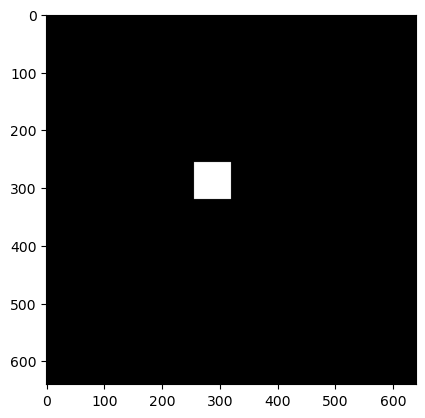

In [14]:
grid_shape = (640, 640)
grid = init_grid(grid_shape)
plt.imshow(grid, cmap='gray')

In [15]:
def evolve(grid, dt, D=1):
    return grid + dt * D * laplacian(grid)

In [16]:
def run_experiment(num_iterations):
    grid_shape = (640, 640)
    grid = init_grid(grid_shape)
    start_time = time.time()
    for i in range(num_iterations):
        grid = evolve(grid, 0.1)
    exec_time = time.time() - start_time 
    return grid, exec_time

execution time: 488.37 sec.


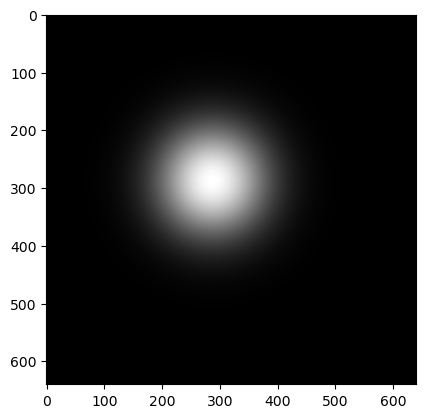

In [22]:
if __name__ == "__main__":
    num_iterations = 20000
    diffuse_grid, exec_time = run_experiment(num_iterations)
    print('execution time: {:.2f} sec.'.format(exec_time))
    plt.imshow(diffuse_grid, cmap='gray')

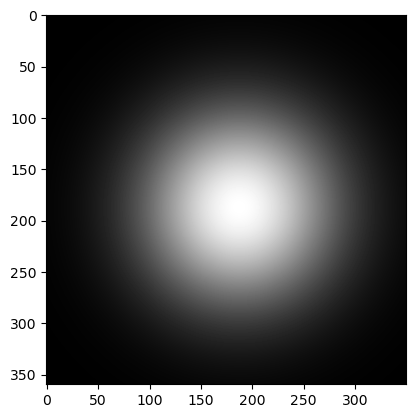

In [23]:
plt.imshow(diffuse_grid[100:460, 100:-190], cmap='gray')

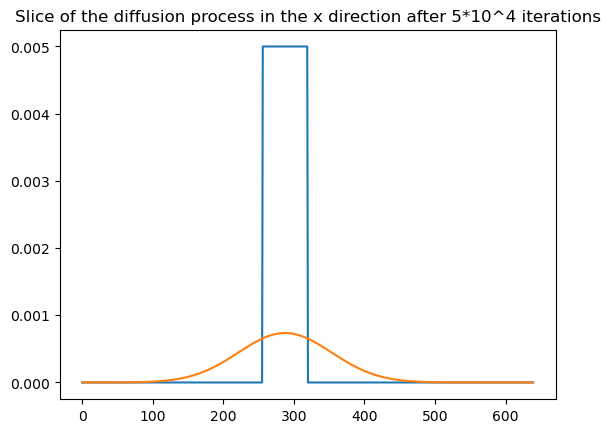

In [24]:
diffuse_grid_x = diffuse_grid[300,:]
x = np.arange(0, diffuse_grid_x.shape[0])
plt.title('Slice of the diffusion process in the x direction after 5*10^4 iterations')
plt.plot(x, grid[300,:])
plt.plot(x, diffuse_grid_x)